<h2 style="color:MediumVioletRed; font-family:Cursive"><b>Goal of creating this Notebook🎯</h2>

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.

**Table of contents of this notebook: 📭**

1. [Importing Necessary Libraries](#1)

2. [Data Collection](#2)

3. [Data Cleaning](#3)

4. [Exploratory Data Analysis](#4)

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">1. Importing Libraries</h2><a id = "1"></a>

In [1]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">2. Data Collection</h2><a id = "2"></a>

In [2]:
df = pd.read_csv("../../data/bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
df = df.rename(columns={'TransactionAmount (INR)':'TransactionAmount'})

In [4]:
df.shape

(1048567, 9)

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">3. Data Cleaning</h2><a id = "3"></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   TransactionID       1048567 non-null  object 
 1   CustomerID          1048567 non-null  object 
 2   CustomerDOB         1045170 non-null  object 
 3   CustGender          1047467 non-null  object 
 4   CustLocation        1048416 non-null  object 
 5   CustAccountBalance  1046198 non-null  float64
 6   TransactionDate     1048567 non-null  object 
 7   TransactionTime     1048567 non-null  int64  
 8   TransactionAmount   1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount,float64,93024,0


In [7]:
before = df.shape[0]

# delete missing data
df.dropna(inplace=True)

print("Number of rows before: ", before)
print("Number of rows after: ", df.shape[0])
print("Number of rows deleted: ", before - df.shape[0])
del before

Number of rows before:  1048567
Number of rows after:  1041614
Number of rows deleted:  6953


In [8]:
#check for duplication
df.duplicated().sum()

0

In [9]:
# convert type of columns TransactionDate,CustomerDOB from string to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x: x.split('/')[0] + '/' + x.split('/')[1] + '/19' + x.split('/')[2] if len(x.split('/')[2]) == 2 else x)
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

C:\Users\carlo\AppData\Local\Temp\ipykernel_9576\1403814583.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [10]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


<p> calculate customer age :</p>
<p> CustomerDOB is the birth date of the customer , TransactionDate : is the date of transaction that customer is done
</p>

In [11]:
before = df.shape[0]

df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df = df[(df['CustomerAge'] > 15) & (df['CustomerAge'] < 100)]

print("Number of rows before: ", before)
print("Number of rows after: ", df.shape[0])
print("Number of rows deleted: ", before - df.shape[0])
print("Percentage of rows deleted: ", (before - df.shape[0]) / before * 100, "%")
del before

Number of rows before:  1041614
Number of rows after:  984431
Number of rows deleted:  57183
Percentage of rows deleted:  5.489845566591847 %


In [12]:
print("dates min and max:", df['CustomerDOB'].min(), df['CustomerDOB'].max())
print("age min and max:", df['CustomerAge'].min(), df['CustomerAge'].max())

dates min and max: 1918-03-05 00:00:00 1999-12-28 00:00:00
age min and max: 17 98


<p>I will delete TransactionTime because I do not know what is Transaction of Time. ,and this time  indicates for what days or hours or minutes </p>

In [13]:
df.drop(columns=['TransactionTime'],inplace=True)

In [14]:
df.CustGender.value_counts()

M    711829
F    272602
Name: CustGender, dtype: int64

In [15]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [16]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

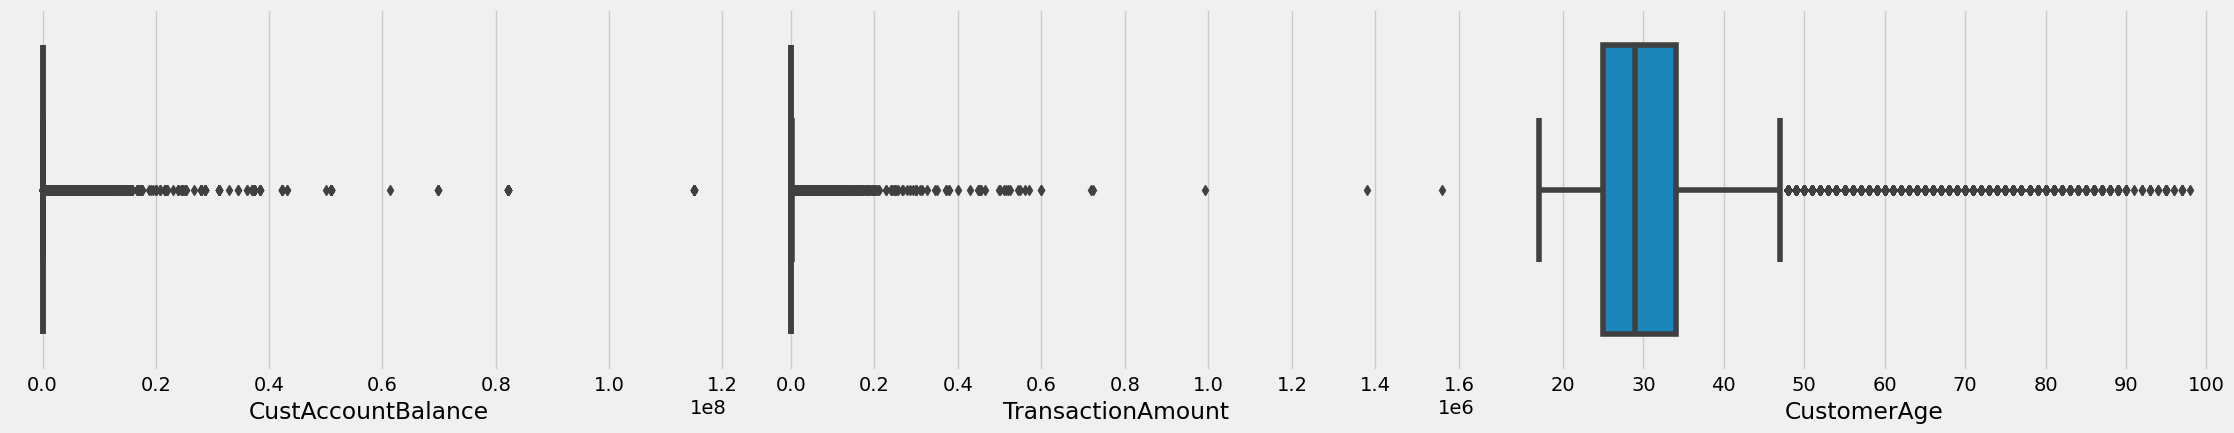

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

<h3 style="color:MediumVioletRed; font-family:Cursive">Observations 💡:</h3>
<p>There is no outliers.I can not say that there is a outliers.May Some variables seem like outliers but they are not, I decided spare any data.</p>
<p>The age is negative because anyone can open a Life Saver youth savings account on behalf of a child or grandchild . </p>

<img src="https://miro.medium.com/max/638/0*JddVeZpHXdElEec_" alt="RFM" >
<p style="color:DarkSlateGray">those two articles will help you to understand this topic 📜:</p>
<a href="https://connectif.ai/en/what-are-rfm-scores-and-how-to-calculate-them/">What Are RFM Scores and How To Calculate Them</a>
<br>
<a href="https://www.datacamp.com/tutorial/introduction-customer-segmentation-python">Introduction to Customer Segmentation in Python</a>

<p>Recency: number of days since the last purchase or order so I will create a new column of TransactionDate to subtract the last transaction from the first transaction</p>

In [18]:
#df['TransactionDate1'] ==> I will keep it to do visaulization
df['TransactionDate1']=df['TransactionDate'] # ==> to calculate the minimum (first transaction)
df['TransactionDate2']=df['TransactionDate'] # ==> to calculate the maximum (last transaction)

In [19]:
#Creating MRF Table Strategy

MRF_df = df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount" : "mean",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

MRF_df = MRF_df.reset_index()
MRF_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount,CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18


In [20]:
MRF_df.shape

(838454, 10)

In [21]:
MRF_df.drop(columns=["CustomerID"],inplace=True)

In [22]:
MRF_df.rename(columns={"TransactionID":"Frequency"},inplace=True)

In [23]:
MRF_df['Recency']=MRF_df['TransactionDate2']-MRF_df['TransactionDate1']
MRF_df['Recency']=MRF_df['Recency'].astype(str)

In [24]:
# extract the day
x='18 day'
re.search('\d+',x).group()

'18'

In [25]:
MRF_df['Recency']=MRF_df['Recency'].apply(lambda x :re.search('\d+',x).group())
MRF_df['Recency']=MRF_df['Recency'].astype(int)

<p> 0 days mean that a customer has done transaction recently one time by logic so I will convert 0 to 1 </p>

In [26]:
def rep_0(i):
    if i==0:
        return 1
    else:
        return i
MRF_df['Recency']=MRF_df['Recency'].apply(rep_0)

In [27]:
MRF_df.drop(columns=["TransactionDate1","TransactionDate2"],inplace=True)

In [28]:
# to claculate the otliers for each feature
lower_list=[]
upper_list=[]
num_list=[]
perc_list=[]
cols=['Frequency', 'CustAccountBalance','TransactionAmount', 'CustomerAge', 'Recency']
for i in cols:
    Q1 = MRF_df[i].quantile(0.25)
    Q3 = MRF_df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # calculate number of outliers
    num=MRF_df[(MRF_df[i] < lower) | (MRF_df[i] > upper)].shape[0]
    # calculate percentage of outliers
    perc = (num / MRF_df.shape[0]) * 100
    lower_list.append(lower)
    upper_list.append(upper)
    num_list.append(num)
    perc_list.append(round(perc,2))

    
dic={'lower': lower_list, 'upper': upper_list, 'outliers': num_list, 'Perc%':perc_list }
outliers_df=pd.DataFrame(dic,index=['Frequency', 'CustAccountBalance','TransactionAmount', 'CustomerAge', 'Recency'])
outliers_df

,lower,upper,outliers,Perc%
Frequency,1.00,1.00,128683,15.35
CustAccountBalance,-72484.01,135130.07,109919,13.11
TransactionAmount,-1312.50,2667.50,87163,10.40
CustomerAge,11.50,47.50,41644,4.97
Recency,1.00,1.00,123320,14.71


<p>May Some variables seem like outliers but they are not, I decided spare any data.</p>

In [29]:
MRF_df.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount,CustomerAge,TransactionDate,Recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">4. Exploratory Data Analysis</h2><a id = "4"></a>

In [30]:
MRF_df.describe()

,Frequency,CustAccountBalance,TransactionAmount,CustomerAge,Recency
count,838454.000000,8.384540e+05,8.384540e+05,838454.000000,838454.000000
mean,1.174103,1.059127e+05,1.453280e+03,31.023165,15.116666
std,0.434863,7.865749e+05,6.046425e+03,8.386135,45.508407
min,1.000000,0.000000e+00,0.000000e+00,17.000000,1.000000
25%,1.000000,5.371270e+03,1.800000e+02,25.000000,1.000000
50%,1.000000,1.768782e+04,4.745000e+02,29.000000,1.000000
75%,1.000000,5.727479e+04,1.175000e+03,34.000000,1.000000
max,6.000000,1.150355e+08,1.560035e+06,98.000000,336.000000


C:\Users\carlo\AppData\Local\Temp\ipykernel_9576\622164415.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=MRF_df.corr()


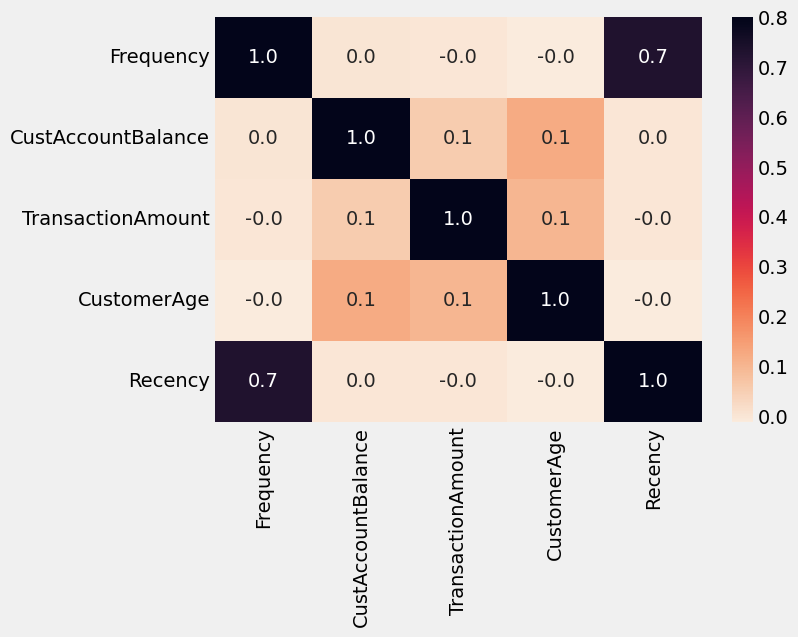

In [31]:
# correlation between features
plt.figure(figsize=(7,5))
correlation=MRF_df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

In [32]:
plt.style.use("fivethirtyeight")
sns.pairplot(MRF_df,hue='Frequency');

Error in callback <function flush_figures at 0x000001E230605BD0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='Frequency',data=MRF_df,palette='rocket', order = MRF_df['Frequency'].value_counts().index)
plt.title("Frequency",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

In [ ]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('rocket')
ax[0].hist(x=MRF_df['CustomerAge'],color='purple')
ax[0].set_title("Distribution of Customer Age")
ax[1].pie(MRF_df['CustGender'].value_counts(),autopct='%1.f%%',colors=palette_color,labels=['Male','Female'])
ax[1].set_title("Customer Gender")
plt.tight_layout();

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,7))
chart=sns.countplot(y='CustLocation',data=MRF_df,palette='rocket', order = MRF_df['CustLocation'].value_counts()[:20].index)
plt.title("Most 20 Location of Customer ",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

In [ ]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x='TransactionAmount (INR)',y='CustAccountBalance',data=MRF_df,palette='rocket',hue='Frequency',size='Recency' )
plt.title("TransactionAmount (INR) and CustAccountBalance",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

In [ ]:
# difference between maximum and minimum date
MRF_df['TransactionDate'].max()-MRF_df['TransactionDate'].min()

In [ ]:
MRF_df=MRF_df.sort_values(by='TransactionDate')
groupbby_month=MRF_df.groupby([pd.Grouper(key='TransactionDate',freq='M')]).mean()
print(groupbby_month.shape)
groupbby_month

In [ ]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
ax[0].plot(groupbby_month.index,groupbby_month['CustAccountBalance'],color='purple',marker='o',label='Customer Account Balance')
ax[0].set_title('Cust Account Balance Over The Time')
ax[1].plot(groupbby_month.index,groupbby_month['TransactionAmount (INR)'],color='purple',marker='o',label='Transaction Amount (INR)')
ax[1].set_title("Transaction Amount(INR) Over The Time")
plt.legend();